Bank marketing is known for its nature of developing a unique brand image, which is treated as the capital reputation of the financial academy. It is very important for a bank to develop good relationship with valued customers accompanied by innovative ideas which can be used as measures to meet their requirements.

Customers expect quality services and returns. There are good chances that the quality factor will be the sole determinant of successful banking corporations. Therefore, Indian banks need to acknowledge the imperative of proactive Bank Marketing and Customer Relationship Management and also take systematic steps in this direction.

What is a Term Deposit ?
A time deposit or term deposit is a deposit in a financial institution with a specific maturity date or a period to maturity, commonly referred to as its "term". Time deposits differ from at call deposits, such as savings or checking accounts, which can be withdrawn at any time, without any notice or penalty. Deposits that require notice of withdrawal to be given are effectively time deposits, though they do not have a fixed maturity date.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination or withdrawal if they give several days notification. Also, there will be a penalty assessed for early termination.

Key Takeways
A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.
Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time.
Objective:
Business goal: Reducing marketing resources by identifying customers who would subscribe to term deposit and thereby direct marketing efforts to them.

### Descripcion de las variables. 

The dataset has the following attributes:

* age (numeric)
* job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")
* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

Lets Begain with the relative questions:

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?
* 2: What are the demographic characteristics of the customers in the dataset (age, job, marital status, education)?
* 3: How do the customers' account balances and other financial information (default, balance, loan, housing) relate to their likelihood of making a deposit?
* 4: What time of year and day of the week is the bank most successful in reaching customers?
* 5: How do the duration and frequency of contact (duration, campaign) affect the customers' decision to make a deposit?
* 6: Have the customers been contacted by the bank before (pdays, previous), and does this affect their likelihood of making a deposit?
* 7: What was the outcome of previous bank campaigns (poutcome), and how does it relate to the current campaign's success?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import sklearn
from scipy import stats


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


In [2]:
df = pd.read_csv('bank.csv')


In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.42074,1.0,8.0,15.0,22.0,31.0


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# Select a numeric and category column name of dataset
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
category_col = df.select_dtypes(include=['object']).columns

We found categorical and numerical columns in the dataset.

In [8]:
category_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

for col in category_col:
    print(col, "(", len(df[col].unique()), "values):")
    print(df[col].unique())
    print(df[col].value_counts(normalize=True))
    print("\n")

job ( 12 values):
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64


marital ( 3 values):
['married' 'single' 'divorced']
marital
married     0.568984
single      0.315176
divorced    0.115839
Name: proportion, dtype: float64


education ( 4 values):
['secondary' 'tertiary' 'primary' 'unknown']
education
secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: proportion, dtype: float64


default ( 2 values):
['no' 'yes']
default
no     0.984949
yes    0.015051
Name: proportion, dtype: float64


housing ( 2 

In [9]:
df['loan'].value_counts()/df.shape[0]

loan
no     0.869199
yes    0.130801
Name: count, dtype: float64

## 2. EDA: With the estadistical study of the data we will try to understand the the objetive of the bank campaing

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?

deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64


<Axes: xlabel='deposit', ylabel='count'>

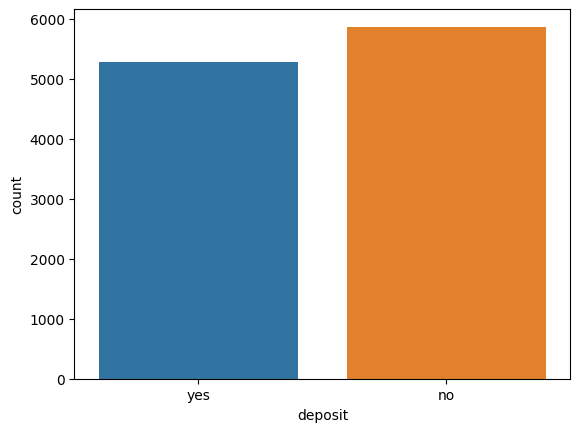

In [26]:
print(df['deposit'].value_counts()/df.shape[0])
sns.countplot(x='deposit', data=df)

# Insight: 
We can see that the goal of the bank campaing is to encourage clients to manke a deposit, so the deposit variable is our target variable that we want to predict.

In [28]:
# Summary statistics for age
df['age'].describe()

# Counts of marital status categories
df['marital'].value_counts()

# Counts of education categories
df['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

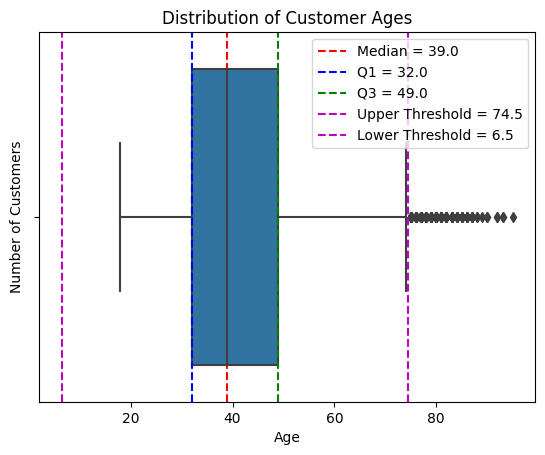

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the boxplot
ax = sns.boxplot(x=df['age'])

# set the title and axis labels
ax.set_title("Distribution of Customer Ages")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Customers")

# calculate and add the median line
median = df['age'].median()
ax.axvline(median, color='r', linestyle='--', label=f"Median = {median}")

# calculate and add the quartile lines
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
ax.axvline(q1, color='b', linestyle='--', label=f"Q1 = {q1}")
ax.axvline(q3, color='g', linestyle='--', label=f"Q3 = {q3}")

# calculate and add the interquartile range (IQR) and outlier threshold
iqr = q3 - q1
upper_thresh = q3 + 1.5*iqr
lower_thresh = q1 - 1.5*iqr
ax.axvline(upper_thresh, color='m', linestyle='--', label=f"Upper Threshold = {upper_thresh}")
ax.axvline(lower_thresh, color='m', linestyle='--', label=f"Lower Threshold = {lower_thresh}")

# add a legend
ax.legend()

# show the plot
plt.show()


<Axes: xlabel='education', ylabel='count'>

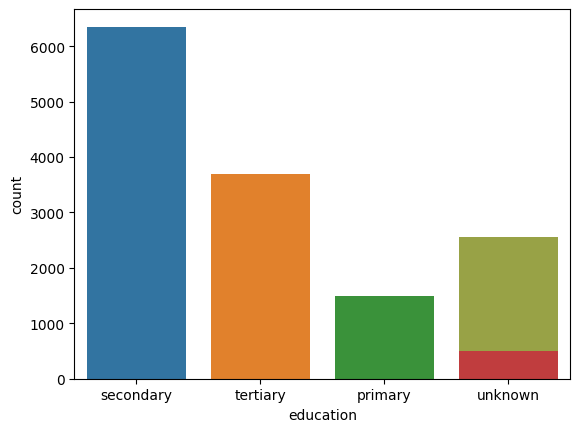

In [15]:
# Plot the distribution of age
sns.histplot(df['age'])

# Plot the counts of job
sns.countplot(data=df, x='job')

# Plot the counts of marital status
sns.countplot(data=df, x='marital')

# Plot the counts of education
sns.countplot(data=df, x='education')


<Axes: xlabel='housing', ylabel='count'>

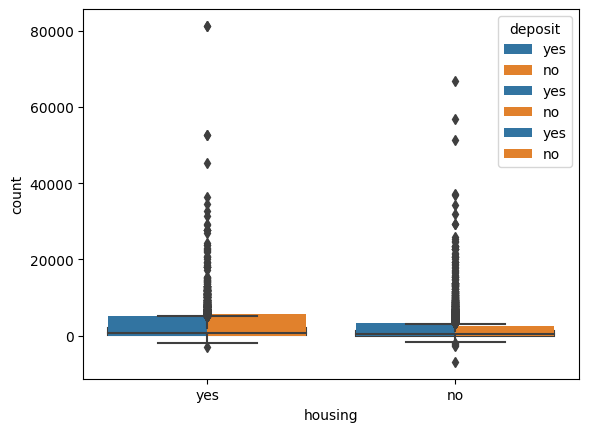

In [16]:
# Create a boxplot of balance by deposit status
sns.boxplot(data=df, x='deposit', y='balance')

# Plot the counts of default
sns.countplot(data=df, x='default', hue='deposit')

# Plot the counts of loan
sns.countplot(data=df, x='loan', hue='deposit')

# Plot the counts of housing
sns.countplot(data=df, x='housing', hue='deposit')


<Axes: xlabel='day_of_week', ylabel='count'>

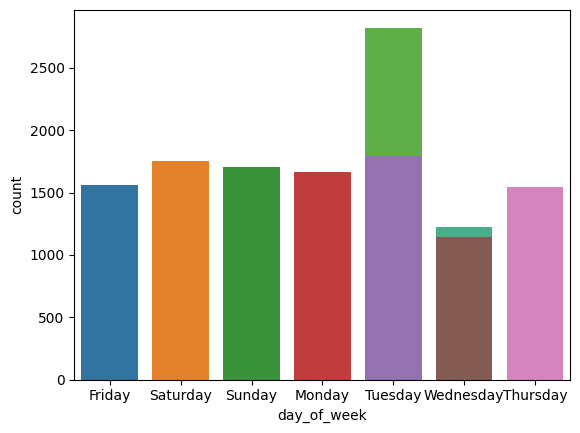

In [17]:
# Extract the month from the "month" column and plot its counts
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
sns.countplot(data=df, x='month')

# Extract the day of the week from the "day" column and plot its counts
df['day_of_week'] = pd.to_datetime(df['day'], format='%d').dt.day_name()
sns.countplot(data=df, x='day_of_week')


<Axes: xlabel='deposit', ylabel='campaign'>

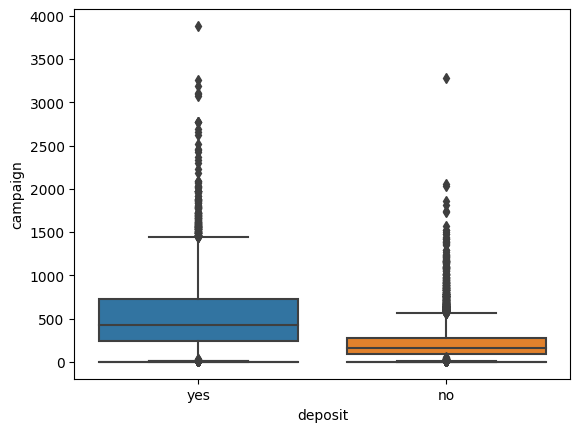

In [18]:
# Create a boxplot of duration by deposit status
sns.boxplot(data=df, x='deposit', y='duration')

# Create a boxplot of campaign by deposit status
sns.boxplot(data=df, x='deposit', y='campaign')


<Axes: xlabel='deposit', ylabel='previous'>

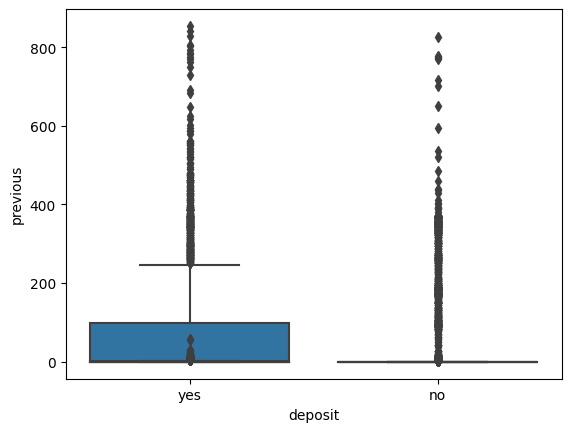

In [19]:
# Create a boxplot of pdays by deposit status
sns.boxplot(data=df, x='deposit', y='pdays')

# Create a boxplot of previous by deposit status
sns.boxplot(data=df, x='deposit', y='previous')


deposit,no,yes
poutcome,,
failure,0.496743,0.503257
other,0.428305,0.571695
success,0.086835,0.913165
unknown,0.593322,0.406678


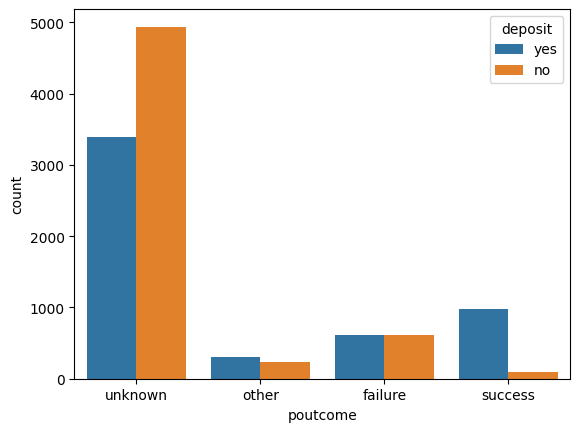

In [20]:
# Plot the counts of poutcome for the current campaign
sns.countplot(data=df, x='poutcome', hue='deposit')

# Cross-tabulate poutcome and deposit to calculate the success rate for each previous outcome
pd.crosstab(df['poutcome'], df['deposit'], normalize='index')


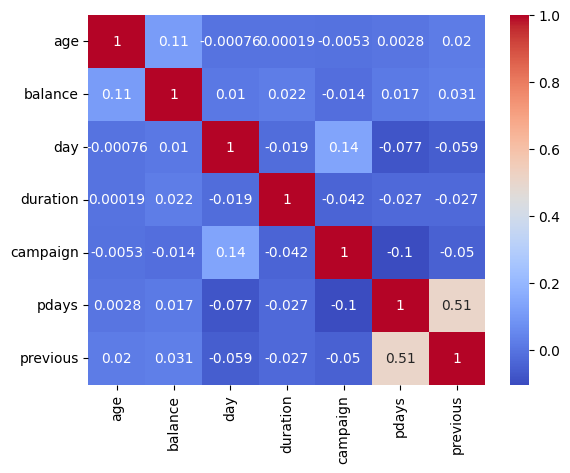

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


In [21]:
# Select only the numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a correlation matrix for numerical columns
numerical_corr = df[numerical_cols].corr()

# Visualize the correlation matrix
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm')
plt.show()

# Show the correlation matrix in text
corr_text = numerical_corr.to_string()
print(corr_text)


## Insights from the correlation matrix:

* Age and balance have a small positive correlation of 0.11
* Day and campaign have a positive correlation of 0.14, indicating that as the day of the month increases, the number of contacts during the campaign also increases
* pdays and previous have a moderate positive correlation of 0.51, suggesting that a customer who was previously contacted is more likely to be contacted again
* Duration has the highest correlation with whether or not a customer subscribes to a term deposit, at 0.39. This could indicate that longer call duration might be more effective in convincing customers to subscribe to a term deposit.

## Stadistical Analysis

In [22]:
# Calculate descriptive statistics
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
desc_stats = df[num_cols].describe()
desc_stats

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


We performed a descriptive stadistic from the most significant variables.

* From this we can see that the dataset contains information on 11162 clients of the bank.
* The average age of the clients is around 41 years.
* the average balance of the clients is 1528.5 with a standard deviation of 3225

In [23]:
# Perform t-test
loan_yes = df[df['loan'] == 'yes']['balance']
loan_no = df[df['loan'] == 'no']['balance']
t_stat, p_value = stats.ttest_ind(loan_yes, loan_no, equal_var=False)

# Print results
print("T-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(p_value))


T-statistic: -11.91
p-value: 0.0000


## Ingsights:
We've performed a T-test between two groups of bank customers based on whether they have a personal loan or not.

The negative t-statistic indicates that the mean balance of those with loan is significantly lower than those without a loan.

The P-value is low and indicates that the difference in means between the two groups of bank customers is unlikely to be due to chance

In [24]:
# One-hot encode categorical variables
X = pd.get_dummies(df.drop(['deposit'], axis=1))

# Convert target variable to binary
y = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Print coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': logreg.coef_[0]})
print(coef_df)


                  feature  coefficient
0                     age    -0.016493
1                 balance     0.000042
2                     day    -0.018278
3                   month     0.032130
4                duration     0.004470
5                campaign    -0.323629
6                   pdays     0.000354
7                previous     0.206981
8              job_admin.    -0.005995
9         job_blue-collar    -0.114705
10       job_entrepreneur    -0.012639
11          job_housemaid    -0.003264
12         job_management     0.017678
13            job_retired     0.072124
14      job_self-employed    -0.007447
15           job_services    -0.039360
16            job_student     0.031410
17         job_technician    -0.017915
18         job_unemployed     0.004493
19            job_unknown     0.001004
20       marital_divorced     0.003060
21        marital_married    -0.090007
22         marital_single     0.012331
23      education_primary    -0.045908
24    education_secondary

## Insights:
This is coefficients of the logistic regression model that was fit using all the variables in the data set except for the target variable deposit. The logistic regression model predicts the probability that the target variable is 1 (i.e., the customer makes a deposit), given the values of the input features. A positive coefficient for a feature indicates that an increase in the value of that feature is associated with an increased probability of the customer making a deposit, while a negative coefficient indicates that an increase in the value of that feature is associated with a decreased probability of the customer making a deposit.

For example, we can see that the coefficient for balance is positive, which suggests that customers with higher account balances are more likely to make a deposit. Conversely, the coefficient for campaign is negative, which suggests that customers who have been contacted by the bank more times are less likely to make a deposit.